## Experimento: ajuste de distribuição de probabilidade

* Uso de Janelas de Parzen

## Importação das bibliotecas

In [7]:
import numpy as np                      #Função para operação matricial e etc.

import matplotlib.pyplot as plt         #Função para geração de gráficos
from matplotlib import cm               #Acesso à paletas de cores pré-definidas
import matplotlib.gridspec as gridspec  #Útil para oragnizar as figuras em subgráficos
from mpl_toolkits.mplot3d import Axes3D #Permite projeção 3d

import csv                              #Necessário na função implementada para leitura de dados

#Permite o uso do LaTeX nos gráficos a serem gerados
from matplotlib import rcParams
rcParams['text.usetex'] = True
rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'

## Definição das funções utilizadas

In [8]:
#Função de leitura dos dados------------------------------------
def read_class_data(path):
    with open(path, newline='') as f:
        reader = csv.reader(f,delimiter=',')
        for row in reader:
            try:
                data = np.vstack( (data , np.asarray(row).astype(np.float) ) )
            except:
                data = np.asarray(row).astype(np.float)
    f.close()
    y = data[:,0]
    x = data[:,1:]
    return y,x


#--------------------------------------
def funcao_phi(x):
    p = (x.dot( x.T ))
    res = 1/np.sqrt(2 * np.pi) * np.exp( -p/2 )
    return res


#--------------------------------------
def janela_parzen(x,h,dataSet):
    n = np.shape(dataSet)[1]
    m = np.shape(dataSet)[0]

    factor = (1/(h**n)) * (1/m)
    s = 0.0
    for i in range(0,m):
        z = (dataSet[i,:] - x)/h
        s += funcao_phi(z)
    
    return (factor * s)

## Leitura dos dados (início do experimento)

In [9]:
path_data = 'saidaSim_D.txt'

#Não vamos usar o y... apenas os dados já simulados
y,x = read_class_data(path_data)

## Definição de variáveis e itens de 

In [11]:
h = 1.5 #largura da "banda" usada para estimar as probabilidades

## Execução do método Janela de Parzen

In [12]:
#Número de itens/atributo
N = 200

#Definição espaço de atributos -- intervalo de valores em cada eixo (xmin~xmax) X (ymin ~ymax)
xmin = np.min(x[:,0]); xmax = np.max(x[:,0])
ymin = np.min(x[:,1]); ymax = np.max(x[:,1])

#Útil o experimento e para os gráficos a seguir
X1, X2 = np.meshgrid(np.linspace(xmin, xmax, N), np.linspace(ymin, ymax, N))

#Aplicação do método
Z = np.zeros((N,N))
for i in range(0,N):
    for j in range(0,N):
        Z[i,j] = janela_parzen( [X1[i,j], X2[i,j]] ,h, x)

## Visualizar os dados e a distribuição estimada...

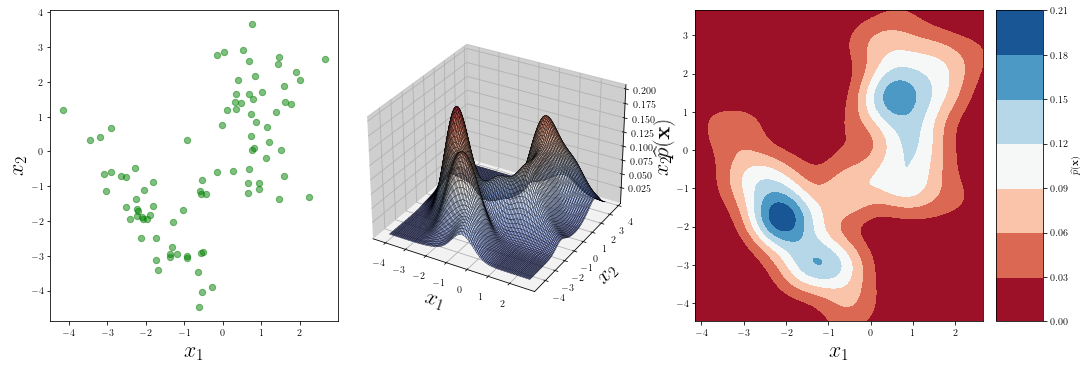

In [13]:
FS = (15,5) #Tamanho da figura a ser gerada
fig = plt.figure(constrained_layout=True,figsize=FS)
spec = gridspec.GridSpec(ncols=3, nrows=1, figure=fig)


# Subplot 1 ------------------------
ax1 = fig.add_subplot(spec[0, 0])
ax1.scatter(x[:,0],x[:,1], marker='o', color='green', s=40, alpha=0.5)
ax1.set_xlabel('$x_1$', fontsize=22)
ax1.set_ylabel('$x_2$', fontsize=22)


# Subplot 2 ------------------------
ax2 = fig.add_subplot(spec[0, 1],projection='3d')
ax2.plot_surface(X1, X2, Z, rstride=2, cstride=2, linewidth=0.25, antialiased=True,cmap=cm.coolwarm, edgecolors='k',alpha=0.5)
ax2.w_xaxis.set_pane_color((0.75, 0.75, 0.75, 0.75))
ax2.w_yaxis.set_pane_color((0.75, 0.75, 0.75, 0.75))
ax2.w_zaxis.set_pane_color((0.95, 0.95, 0.95, 0.95))
ax2.set_xlabel('$x_1$', fontsize=22)
ax2.set_ylabel('$x_2$', fontsize=22)
ax2.set_zlabel(r'$\widehat{p}(\mathbf{x})$', fontsize=22)


# Subplot 3 ------------------------
ax3 = fig.add_subplot(spec[0, 2])
g1 = ax3.contourf(X1, X2, Z, cmap=cm.RdBu)
ax3.set_xlabel('$x_1$', fontsize=22)
ax3.set_ylabel('$x_2$', fontsize=22)
fig.colorbar(g1, orientation="vertical", label= r'$\widehat{p}(\mathbf{x})$')

plt.show()